In [1]:
!pip install pulp
import pulp

# A blending problem

# Problem Description

Whiskas cat food is manufactured by Uncle Ben’s. Uncle Ben’s want to produce their cat food products as cheaply as possible while ensuring they meet the stated nutritional analysis requirements shown below. Thus, they want to vary the quantities of each ingredient used (the main ingredients being chicken, beef, mutton, rice, wheat and gel) while still meeting their nutritional standards. A can of Whiskas cat food containts 100 grams of food.

Requirements:
- Protein: at least 8g
- Fat: at least 6g
- Fibre: at least 2g
- Salt: at least 0.4g

The costs of the chicken, beef, and mutton are 0.013, 0.008 and 0.010 respectively, while the costs of the rice, wheat and gel are 0.002, 0.005 and 0.001 respectively. All costs are per gram in dollars.

Each ingredient contributes to the total weight of protein, fat, fibre and salt in the final product. The contributions (in grams) per gram of ingredient are given in the table below.

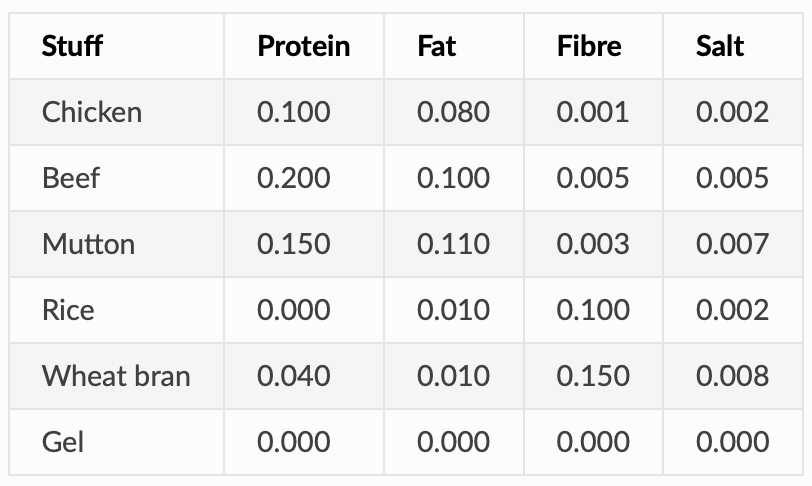

# 0 Data

In [2]:
# Creates a list of the Ingredients
Ingredients = ["CHICKEN", "BEEF", "MUTTON", "RICE", "WHEAT", "GEL"]

# A dictionary of the costs of each of the Ingredients is created
costs = {
    "CHICKEN": 0.013,
    "BEEF": 0.008,
    "MUTTON": 0.010,
    "RICE": 0.002,
    "WHEAT": 0.005,
    "GEL": 0.001,
}

# A dictionary of the protein percent in each of the Ingredients is created
proteinPercent = {
    "CHICKEN": 0.100,
    "BEEF": 0.200,
    "MUTTON": 0.150,
    "RICE": 0.000,
    "WHEAT": 0.040,
    "GEL": 0.000,
}

# A dictionary of the fat percent in each of the Ingredients is created
fatPercent = {
    "CHICKEN": 0.080,
    "BEEF": 0.100,
    "MUTTON": 0.110,
    "RICE": 0.010,
    "WHEAT": 0.010,
    "GEL": 0.000,
}

# A dictionary of the fibre percent in each of the Ingredients is created
fibrePercent = {
    "CHICKEN": 0.001,
    "BEEF": 0.005,
    "MUTTON": 0.003,
    "RICE": 0.100,
    "WHEAT": 0.150,
    "GEL": 0.000,
}

# A dictionary of the salt percent in each of the Ingredients is created
saltPercent = {
    "CHICKEN": 0.002,
    "BEEF": 0.005,
    "MUTTON": 0.007,
    "RICE": 0.002,
    "WHEAT": 0.008,
    "GEL": 0.000,
}

# 1 Initialize problem

In [3]:
prob = pulp.LpProblem("WhiskasProblem", pulp.LpMinimize)

# 2 Declare decision variables

In [4]:
# percentage of ingredient in a can of cat food
ingredient_vars = pulp.LpVariable.dicts("Ingr", Ingredients, lowBound=0, cat='Continuous')

# 3 Define objective function

In [5]:
prob += pulp.lpSum([costs[ingredient] * ingredient_vars[ingredient] for ingredient in Ingredients])

# 4 Define constraints

In [6]:
prob += pulp.lpSum([ingredient_vars[ingredient] for ingredient in Ingredients]) == 100 # a can contains 100g
prob += pulp.lpSum([proteinPercent[i] * ingredient_vars[i] for i in Ingredients]) >= 8.0 # Protein requirement
prob += pulp.lpSum([fatPercent[i] * ingredient_vars[i] for i in Ingredients]) >= 6.0 # Fat requirement
prob += pulp.lpSum([fibrePercent[i] * ingredient_vars[i] for i in Ingredients]) <= 2.0 # Fibre requirement
prob += pulp.lpSum([saltPercent[i] * ingredient_vars[i] for i in Ingredients]) <= 0.4 # Salt requirement

# 5 Solve the problem

In [7]:
prob.solve()

if prob.status == 1:
    print(f'Solution is optimal: {pulp.constants.LpStatusOptimal == 1}')
    for ingredient in ingredient_vars.keys():
        print(f'Optimal value for {ingredient} = {ingredient_vars[ingredient].varValue}')
    print(f'Total costs: {sum(ingredient_vars[ingredient].varValue * costs[ingredient] for ingredient in ingredient_vars.keys())}')
else:
    print(f'Failed to find solution: {pulp.LpStatus[model.status]}')

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/schaefer/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/kx/vr44gt9s6b96j_b0y2_ypbs80000gp/T/f8523900a4564e038141d622bf338084-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/kx/vr44gt9s6b96j_b0y2_ypbs80000gp/T/f8523900a4564e038141d622bf338084-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 10 COLUMNS
At line 42 RHS
At line 48 BOUNDS
At line 49 ENDATA
Problem MODEL has 5 rows, 6 columns and 25 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 5 (0) rows, 6 (0) columns and 25 (0) elements
0  Obj 0 Primal inf 405.05674 (3)
2  Obj 0.52
Optimal - objective value 0.52
Optimal objective 0.52 - 2 iterations time 0.002
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.02

Solution is 

# What if we additionally want to maximize the amount of chicken and rice?

In [8]:
weight1, weight2, weight3 = 0.8, 0.1, 0.1

prob = pulp.LpProblem("WhiskasProblem", pulp.LpMinimize)

ingredient_vars = pulp.LpVariable.dicts("Ingr", Ingredients, lowBound=0, cat='Continuous')

prob += (weight1 * pulp.lpSum([costs[ingredient] * ingredient_vars[ingredient] for ingredient in Ingredients])
         - weight2 * ingredient_vars['CHICKEN']
         - weight3 * ingredient_vars['RICE'])

prob += pulp.lpSum([ingredient_vars[ingredient] for ingredient in Ingredients]) == 100 # a can contains 100g
prob += pulp.lpSum([proteinPercent[i] * ingredient_vars[i] for i in Ingredients]) >= 8.0 # Protein requirement
prob += pulp.lpSum([fatPercent[i] * ingredient_vars[i] for i in Ingredients]) >= 6.0 # Fat requirement
prob += pulp.lpSum([fibrePercent[i] * ingredient_vars[i] for i in Ingredients]) <= 2.0 # Fibre requirement
prob += pulp.lpSum([saltPercent[i] * ingredient_vars[i] for i in Ingredients]) <= 0.4 # Salt requirement         

prob.solve()

if prob.status == 1:
    print(f'Solution is optimal: {pulp.constants.LpStatusOptimal == 1}')
    for ingredient in ingredient_vars.keys():
        print(f'Optimal value for {ingredient} = {ingredient_vars[ingredient].varValue}')
    print(f'Total costs: {sum(ingredient_vars[ingredient].varValue * costs[ingredient] for ingredient in ingredient_vars.keys())}')
else:
    print(f'Failed to find solution: {pulp.LpStatus[model.status]}')

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/schaefer/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/kx/vr44gt9s6b96j_b0y2_ypbs80000gp/T/bd57d4dda45142b9b3406642cca4c7da-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/kx/vr44gt9s6b96j_b0y2_ypbs80000gp/T/bd57d4dda45142b9b3406642cca4c7da-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 10 COLUMNS
At line 42 RHS
At line 48 BOUNDS
At line 49 ENDATA
Problem MODEL has 5 rows, 6 columns and 25 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 5 (0) rows, 6 (0) columns and 25 (0) elements
0  Obj 0 Primal inf 405.05674 (3) Dual inf 0.27870765 (2)
0  Obj 0 Primal inf 405.05674 (3) Dual inf 4.2875514e+11 (6)
5  Obj -9.1288889
Optimal - objective value -9.1288889
Optimal objective -9.128888889 - 5 iterations time 0.002
Option for printingOptions change